In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.metrics import r2_score, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.preprocessing import PowerTransformer
import graphviz

In [2]:
def train_test_model(reg, X_train, y_train, X_test, y_test):
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)   # Make prediction on the training data
    y_test_pred = reg.predict(X_test)  # Make predictions on test data
    return y_train_pred, y_test_pred

In [4]:
df.loc[df['bandgap'] < 0].index

Int64Index([], dtype='int64')

/Users/afridshirsekar/opt/anaconda3/envs/Graphnet/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.91 and sigma = 0.65



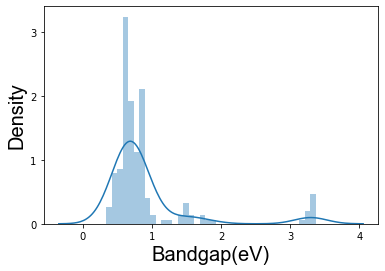

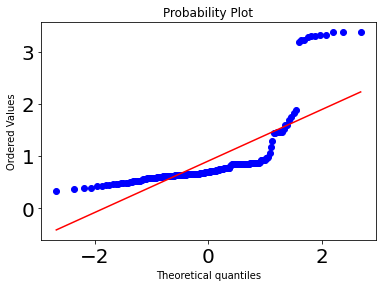

In [3]:
os.chdir('/Users/afridshirsekar/Desktop/PYTHON DIRECTORY/')
df = pd.read_csv('Compositions_ac.csv', sep = '\t')
df = df.drop([108], axis = 'index')
#df1[df1['bandgap'] < 0 ]
sns.distplot(df['bandgap'], norm_hist= True)
(mu, sigma) = norm.fit(df['bandgap'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
axis_font = {'fontname':'Arial', 'size':'20'}
plt.ylabel('Density', **axis_font)
plt.xlabel('Bandgap(eV)', **axis_font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['bandgap'], plot=plt)
plt.show()

In [5]:
df2 = np.array(df['bandgap'])
df2= df2.reshape(-1,1)
#df_standardised = (power_transform(df2, method= 'box-cox'))
#print(type(df2['bandgap'])
#sns.displot(df_standardised)
#plt.show()
pt = PowerTransformer()
print(pt.fit(df2))
print(pt.lambdas_)
print(pt.transform(df2))

PowerTransformer()
[-3.29952972]
[[ 1.56325718]
 [ 1.56299514]
 [ 1.74414703]
 [ 1.67427425]
 [ 1.56358549]
 [ 1.61244482]
 [ 1.54522445]
 [ 1.54769891]
 [ 1.56081897]
 [ 1.67382678]
 [-0.33201852]
 [ 0.09558781]
 [-1.14117313]
 [-1.56878687]
 [-1.99715451]
 [-1.69145751]
 [-1.23290281]
 [-1.41257862]
 [-1.82944475]
 [-1.23506246]
 [-2.00825828]
 [-1.37494142]
 [-0.4704829 ]
 [-0.30480248]
 [-0.49996957]
 [-0.33220474]
 [-0.44268288]
 [-0.33047773]
 [-0.34438273]
 [-1.27515716]
 [-0.41394104]
 [-0.47170099]
 [-0.59953826]
 [-0.43983373]
 [-0.44720478]
 [-0.37235898]
 [-0.48628419]
 [-0.47489353]
 [-0.44088124]
 [-0.48985085]
 [-0.4853419 ]
 [-0.51629907]
 [-0.62982468]
 [-0.36817296]
 [-0.46831424]
 [-0.37353093]
 [-0.35775626]
 [-0.44814101]
 [-0.32603783]
 [-0.7228486 ]
 [-0.53387214]
 [-0.49166161]
 [-0.19895865]
 [-0.19956725]
 [-0.21493385]
 [-0.19154085]
 [-0.35033523]
 [-0.07508654]
 [ 0.45215222]
 [ 0.48186216]
 [ 0.4910109 ]
 [ 0.49224956]
 [ 0.46539308]
 [ 0.46460771]
 [ 0.46

/Users/afridshirsekar/opt/anaconda3/envs/Graphnet/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


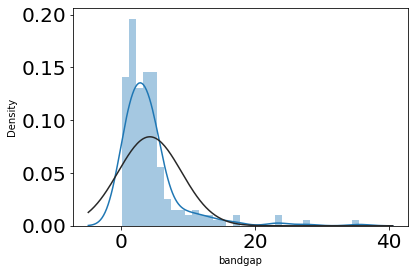

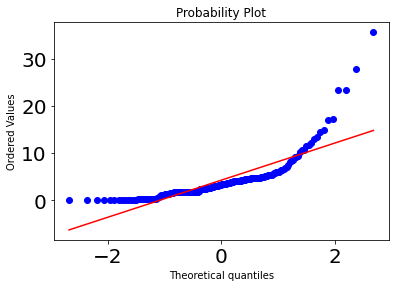

In [6]:
df3 = np.power(df['bandgap'], -3.2995272)
sns.distplot(df3, fit=norm)
plt.show()

fig = plt.figure()
res = stats.probplot(df3, plot=plt)
plt.show()

<AxesSubplot:>

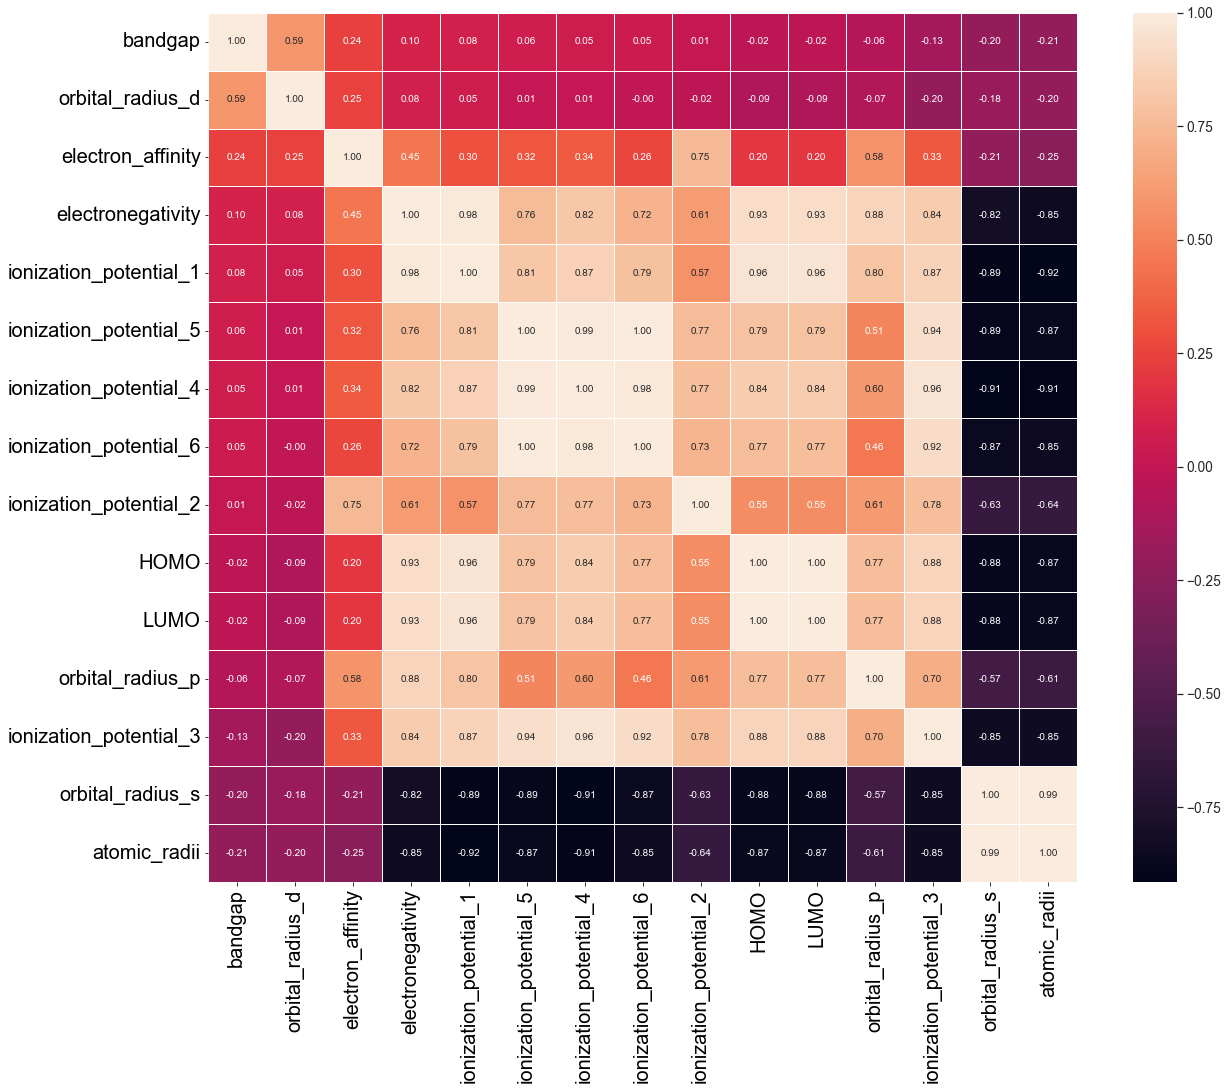

In [11]:
#df = df.drop(columns=['Unnamed: 0'])
x = (len(df.columns)) #number of explanatory variables in the dataframe
corrmat = df.corr(method = 'pearson')
cols = corrmat.nlargest(x, 'bandgap')['bandgap'].index
cormat = np.corrcoef(df[cols].values.T)
#print(cm)
f, ax = plt.subplots(figsize=(20, 16))
ax.set_ylim(len(cormat)-0.1, -0.1)
ax.set_xlim(len(cormat)-0.1, -0.1)
sns.set(font_scale=1.25)

sns.heatmap(cormat, annot=True, fmt='.2f', ax=ax,linewidth = 1,annot_kws={'size': 10},square = True,cbar=True,yticklabels=['bandgap', 'orbital_radius_d', 'electron_affinity', 'electronegativity', 'ionization_potential_1', 'ionization_potential_5', 'ionization_potential_4', 'ionization_potential_6', 'ionization_potential_2', 'HOMO', 'LUMO', 'orbital_radius_p', 'ionization_potential_3', 'orbital_radius_s', 'atomic_radii'],xticklabels=['bandgap', 'orbital_radius_d', 'electron_affinity', 'electronegativity', 'ionization_potential_1', 'ionization_potential_5', 'ionization_potential_4', 'ionization_potential_6', 'ionization_potential_2', 'HOMO', 'LUMO', 'orbital_radius_p', 'ionization_potential_3', 'orbital_radius_s', 'atomic_radii'])

# XGBOOST REGRESSION METHOD

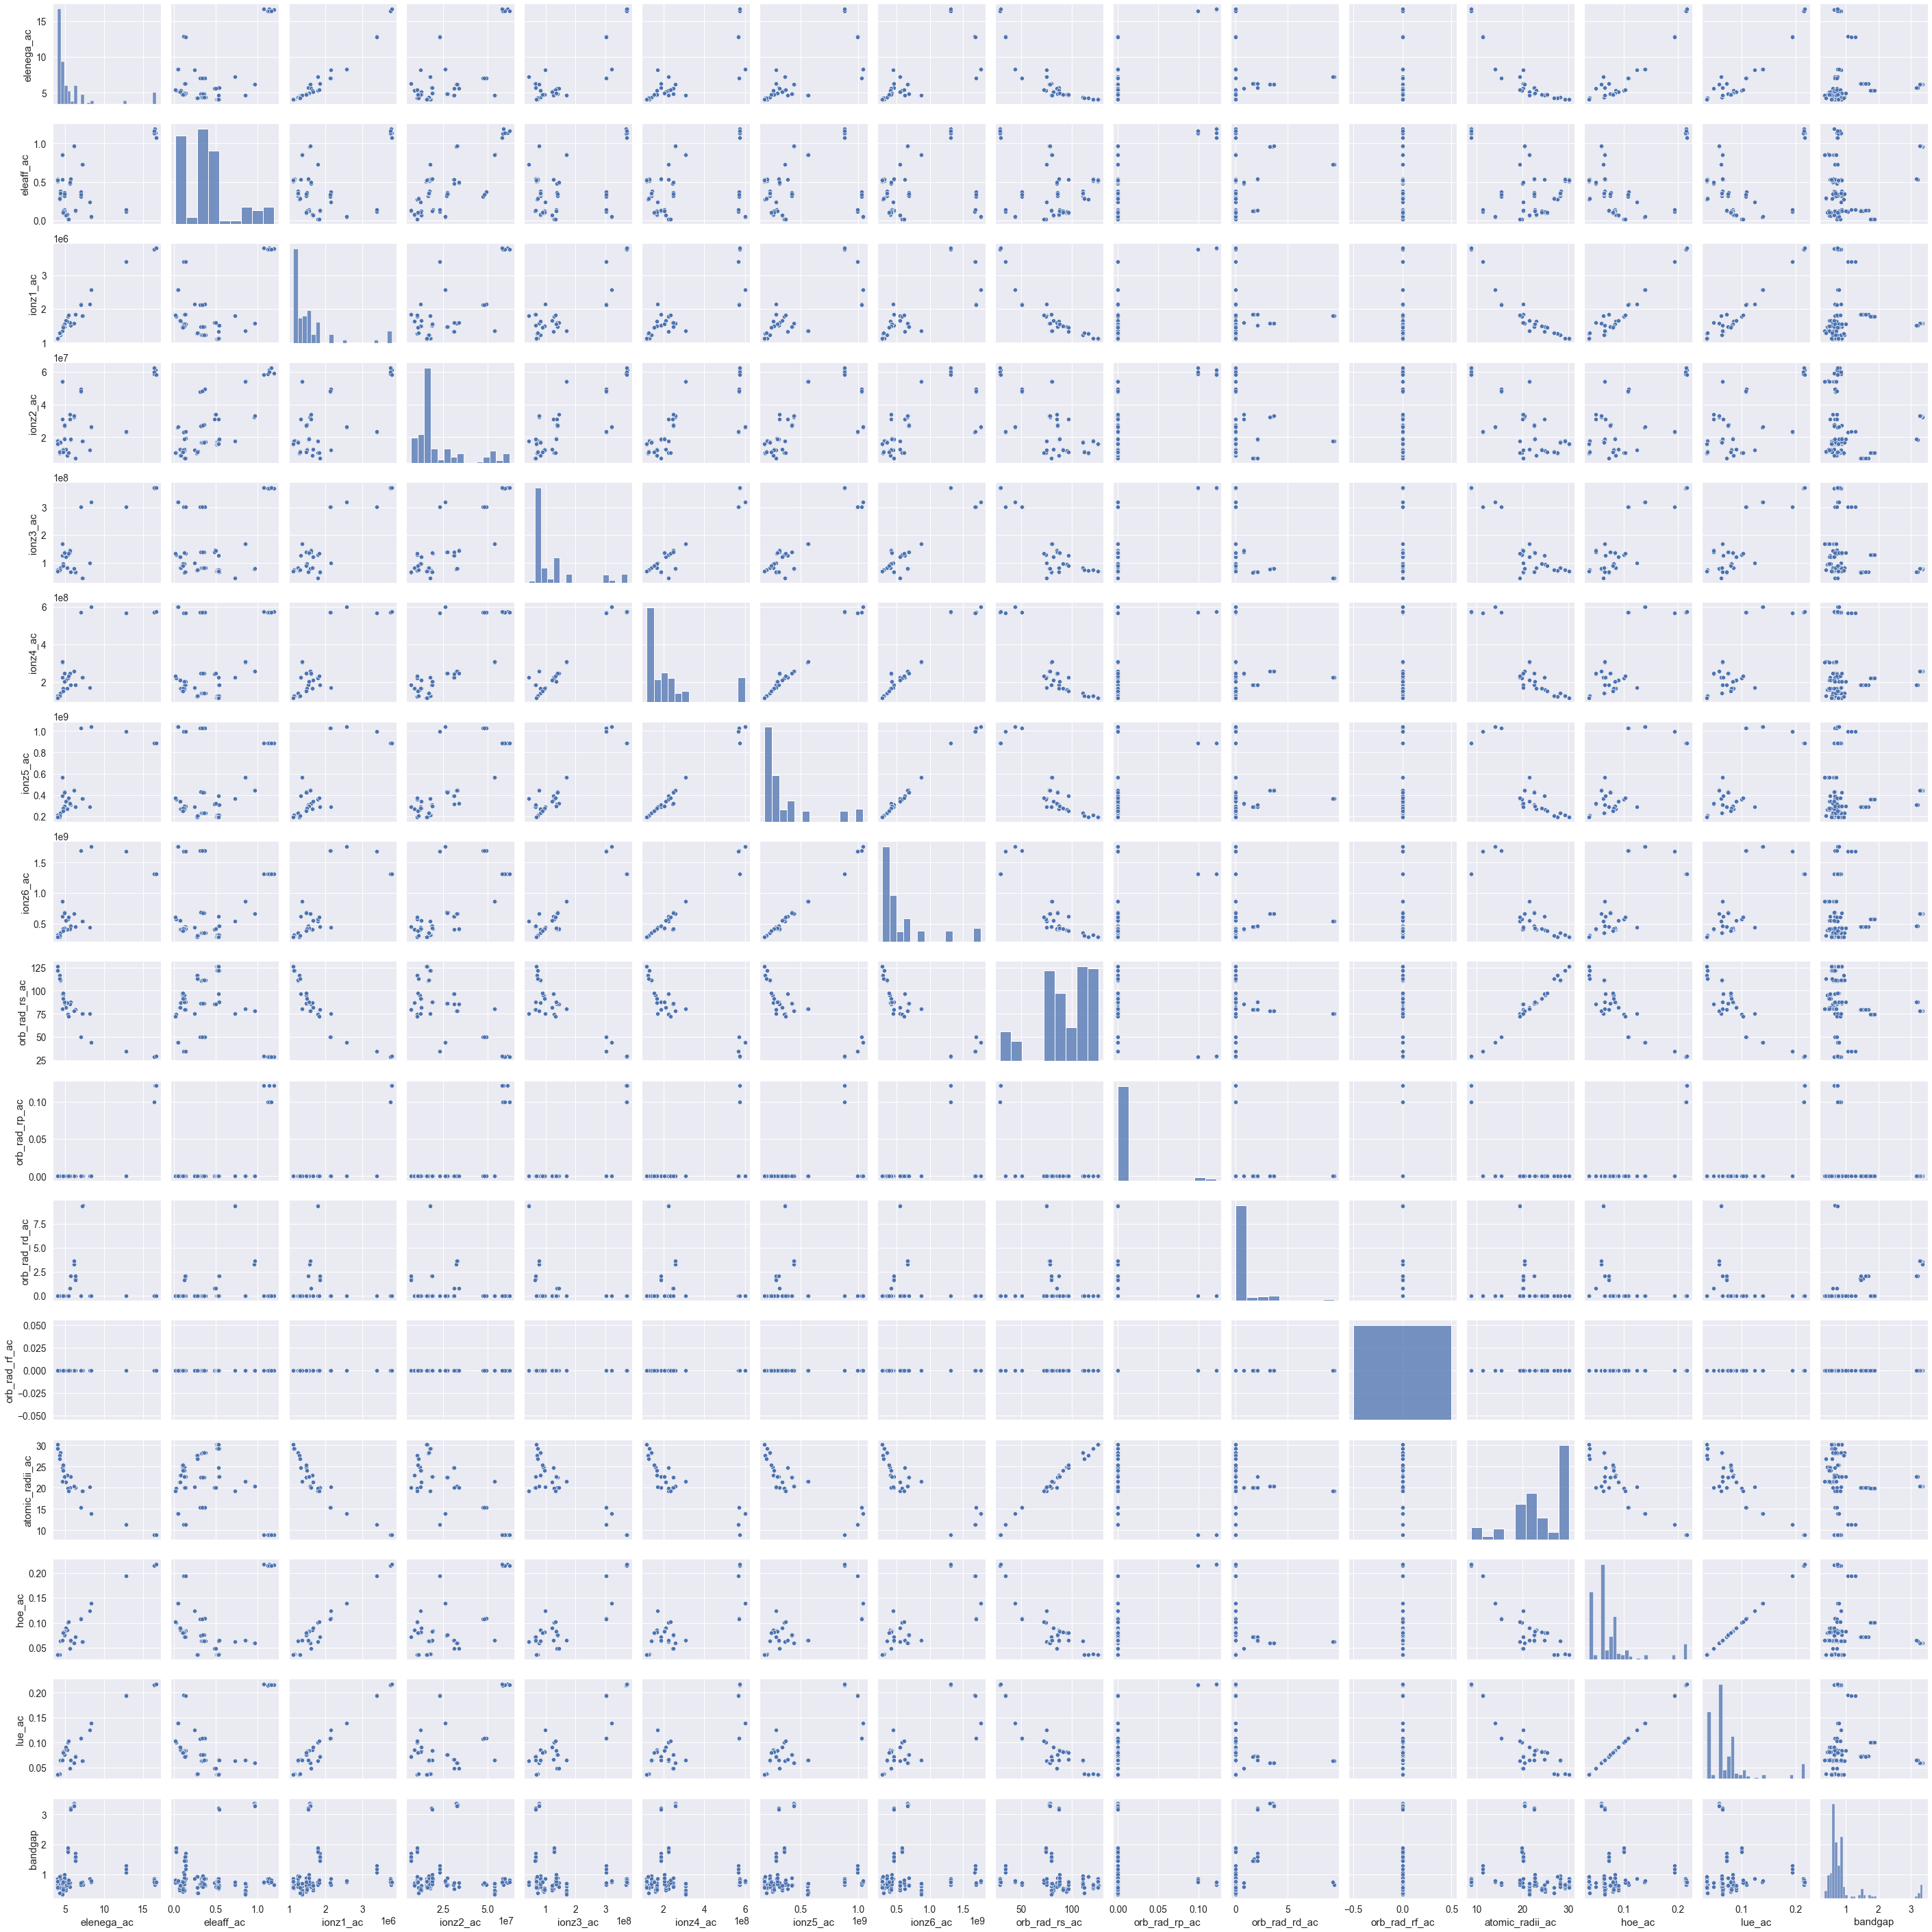

In [ ]:
sns.pairplot(df)

# XGBOOST Model with hyperparameter tuning using GridSearchCV

In [7]:
X = df.drop('bandgap', axis= 1)  #explanatory variables
y = df['bandgap'] #response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = xgb.XGBRegressor()
print(estimator.get_params().keys())
param_grid = {
    'max_depth': [ 5, 6, 8],
    'learning_rate': [ 0.01, 0.03, 0.05, 0.1],
    'min_child_weight': [6, 8], 
    'gamma': [ 0.03, 0.11, 0.3, 0.5],
    'subsample': [ 0.3, 0.52],
    'colsample_bytree': [ 0.3, 0.5],
    'reg_alpha': [ 0.05, 0.1, 0.3]}
    
gbm = GridSearchCV(estimator, param_grid, scoring='neg_median_absolute_error', cv=7, verbose=10, n_jobs=4,return_train_score=True)
gbm.fit(X_train,y_train)
print(gbm.cv_results_)
print('best parameters: {} '.format(gbm.best_params_))
print('best scores: {}'.format(np.abs(gbm.best_score_)))
best = gbm.best_estimator_

# Parity plot 

The rmse for the model is: 0.20421803236462632
The MAE for the model is: 0.13013873517437988


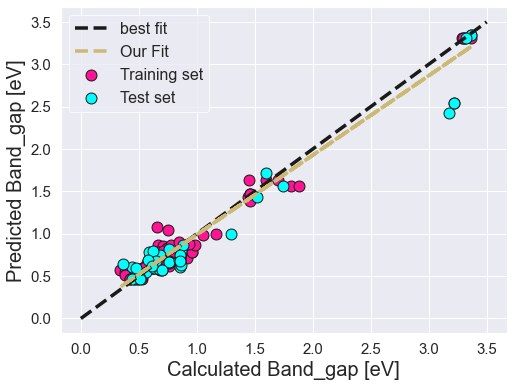

In [14]:


x_ref_line = [0, 3.5]
y_ref_line = [0, 3.5]
x1 = np.array(y_train)
x2 = np.array(y_test)
y_pred_train = best.predict(X_train)
y1 = np.array(y_pred_train)
y_pred_test = best.predict(X_test)
y2 = np.array(y_pred_test)
print('The rmse for the model is:', mean_squared_error(y_test, y_pred_test) ** 0.5)
print('The MAE for the model is:', mean_absolute_error(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, s=120, c='deeppink', edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='cyan', edgecolors='k', linewidths=1, label='Test set')

plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label = 'best fit')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),'y--', linewidth=3.5, label='Our Fit')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Calculated Band_gap [eV]', fontsize = 20)
plt.ylabel('Predicted Band_gap [eV]', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)


# Model search for best performance using best parameters from previous gridsearch and colsample_bytree

In [9]:
X = df.drop('bandgap', axis= 1)  #explanatory variables
#X = X.drop('bandgap_categorical', axis = 1)
y = df['bandgap'] #response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = xgb.XGBRegressor()
print(estimator.get_params().keys())
param_grid = {
    'max_depth': [8],
    'learning_rate': [ 0.1],
    'min_child_weight': [6], 
    'gamma': [ 0.03],
    'subsample': [ 1],
    'colsample_bytree': [0.7, 0.73, 0.75, 0.77],
    'reg_alpha': [0.1]}
    
gbm = GridSearchCV(estimator, param_grid, scoring='neg_median_absolute_error', cv=7, verbose=10, n_jobs=4,return_train_score=True)
gbm.fit(X_train,y_train)
print(gbm.cv_results_)
print('best parameters: {} '.format(gbm.best_params_))
print('best scores: {}'.format(np.abs(gbm.best_score_)))
best = gbm.best_estimator_

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])
Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7; 1/4] START colsample_bytree=0.7, gamma=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, subsample=1
[CV 4/7; 1/4] START colsample_bytree=0.7, gamma=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, subsample=1
[CV 2/7; 1/4] START colsample_bytree=0.7, gamma=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, subsample=1
[CV 3/7; 1/4] START colsample_bytree=0.7, gamma=0.03, learning_rate=0.1, max_depth=8, mi

# Parity plot for the new model

The rmse for the training model is: 0.07513051031362417
The rmse for the model is: 0.11588011796679581
The MAE of train prediction is: 0.05218065889985937
The MAE for the model is: 0.08886933295064223


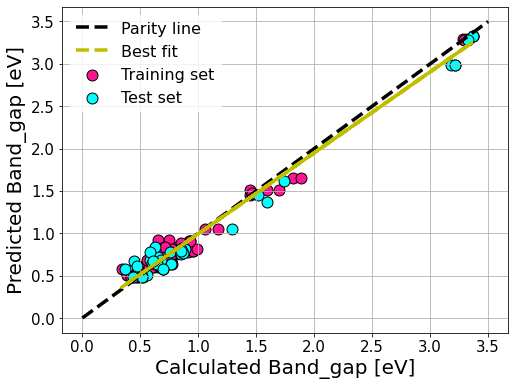

In [10]:
x_ref_line = [0, 3.5]
y_ref_line = [0, 3.5]
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse for the training model is:', mean_squared_error(y_train, y_pred_train) ** 0.5)
print('The rmse for the model is:', mean_squared_error(y_test, y_pred_test) ** 0.5)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred_train))
print('The MAE for the model is:', mean_absolute_error(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, s=120, c='deeppink', edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='cyan', edgecolors='k', linewidths=1, label='Test set')

plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label = 'Parity line')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),'y--', linewidth=3.5, label='Best fit')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Calculated Band_gap [eV]', fontsize = 20)
plt.ylabel('Predicted Band_gap [eV]', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

# Kernel Ridge Regressor

In [12]:
#KernelRidge
#from sklearn.model_selection import KFold
#from sklearn.kernel_ridge import KernelRidge
#clf = KernelRidge(kernel='poly')
#clf.fit(X_train, y_train)
#y_pred0 = clf.predict(X_train)
#y_pred = clf.predict(X_test)
##print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
## Print Result and Output figure
##print('Best parameters found by grid search are:', clf.best_params_)
#print('The rmse of train prediction is:', mean_squared_error(y_train, y_pred0) ** 0.5)
#print('The rmse of test prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
#print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred0))
#print('The MAE of test prediction is:', mean_absolute_error(y_test, y_pred))
#x1 = np.array(y_train)
#x2 = np.array(y_test)
#y1 = np.array(y_pred0)
#y2 = np.array(y_pred)
#plt.plot(x1, y1,'bo', x2, y2, 'ro')
#z = np.polyfit(x1, y1, 1)
#p = np.poly1d(z)
#plt.plot(x1,p(x1),"k--")
#print(r2_score(y_test, y_pred))

# XGBOOST API_BASED VISUALISATION


<Figure size 720x1440 with 0 Axes>

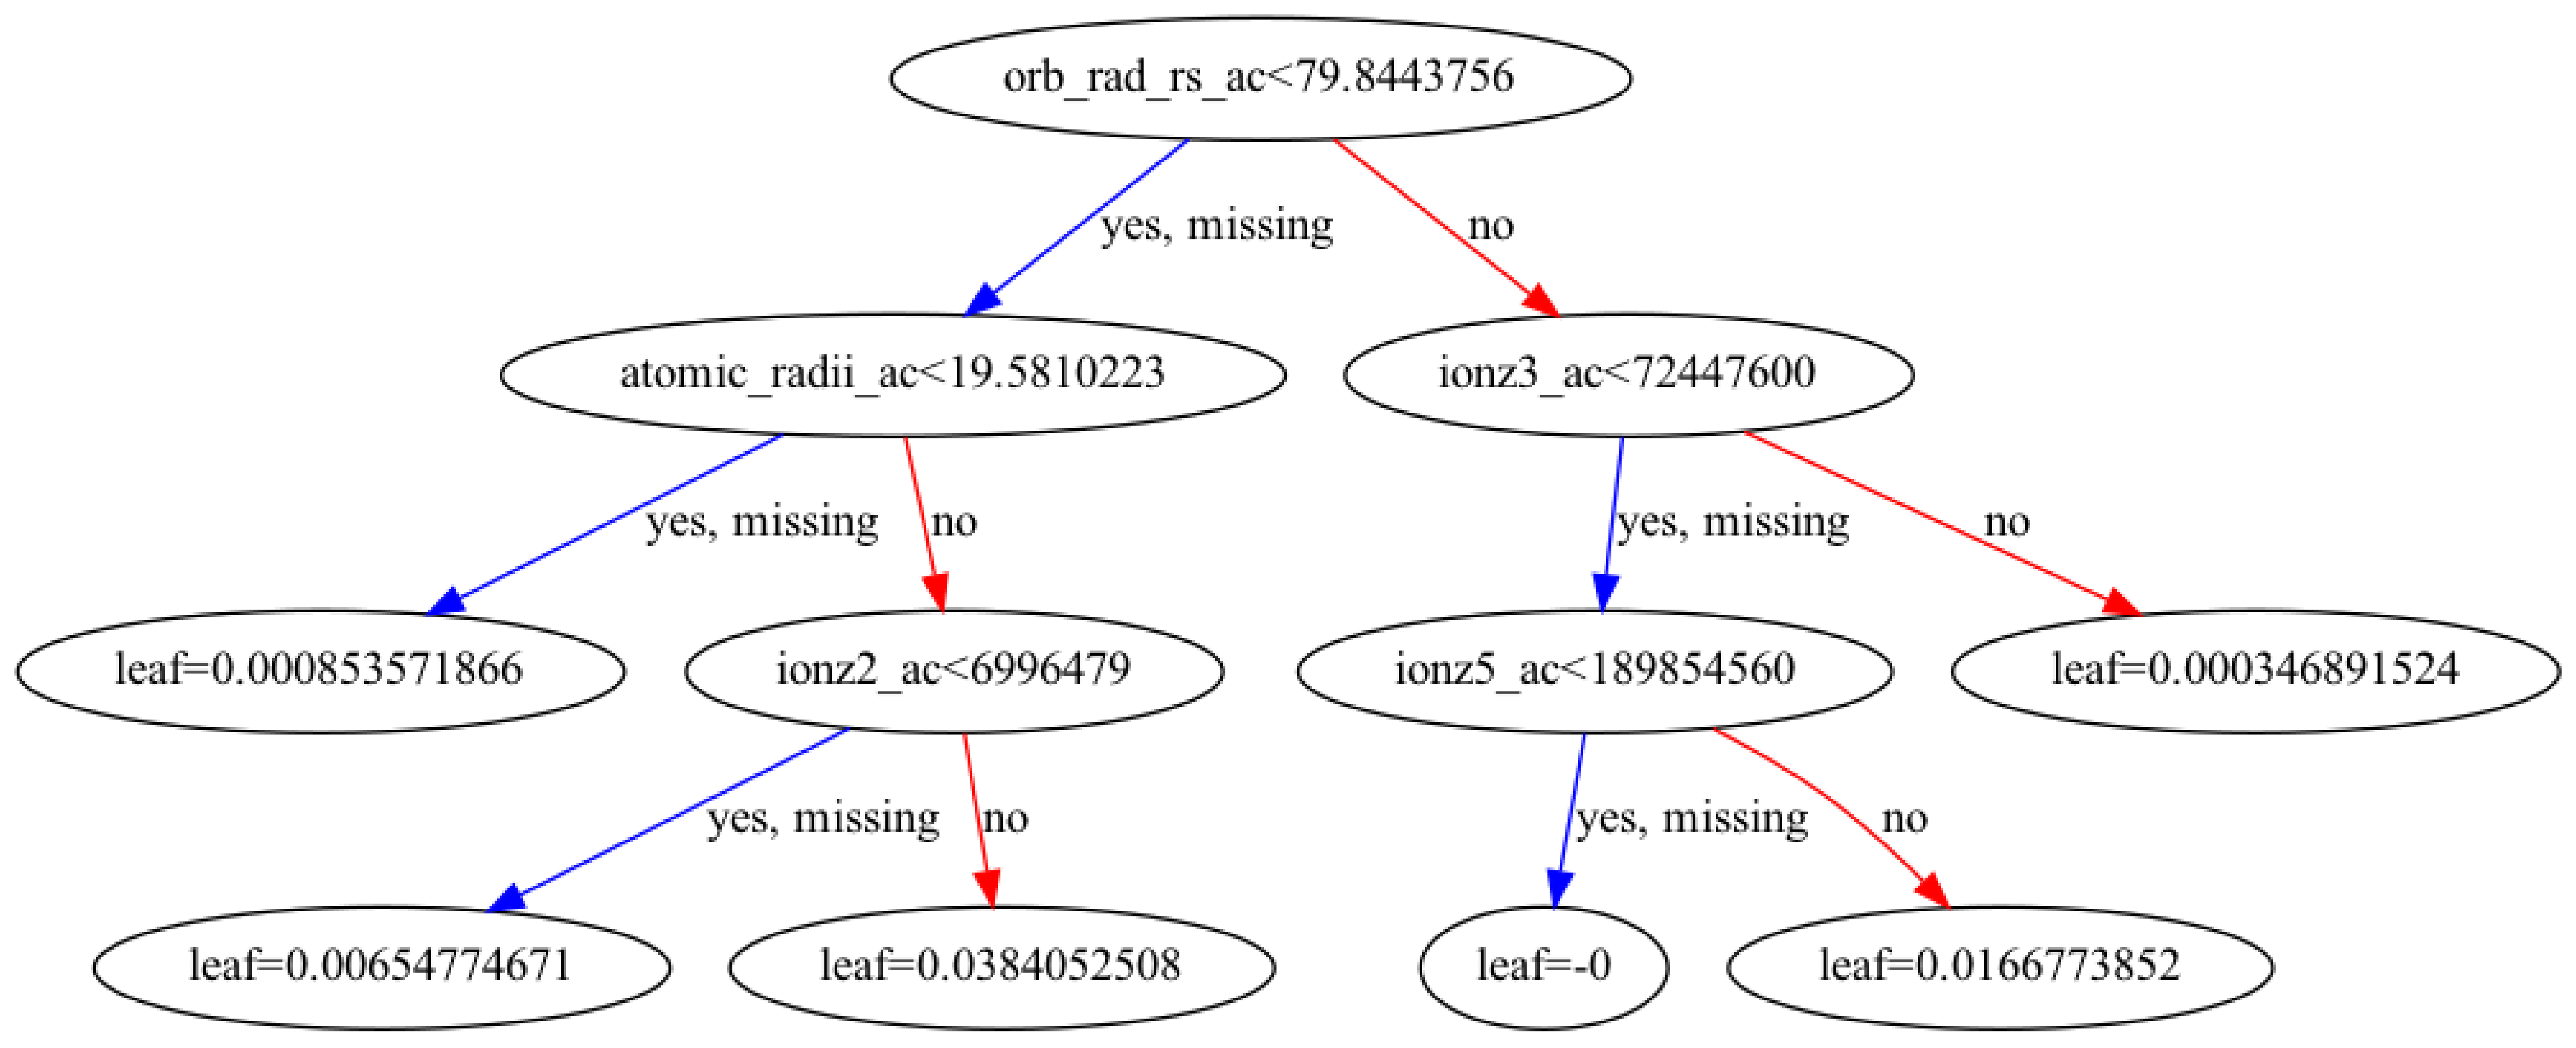

In [18]:

from matplotlib.pylab import rcParams

X_matrix = xgb.DMatrix(data = X, label = y)
params = {'colsample_bytree': 0.7, 'gamma': 0.11, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.3, 'subsample': 1} 
xg_reg = xgb.train(dtrain = X_matrix, params = params, num_boost_round = 10000)
rcParams['figure.figsize'] = 80,50
plt.figure(figsize=(10,20))
xgb.plot_tree(xg_reg, num_trees = 20)
plt.show()

# XGB CLASSIFIER


In [19]:
df['bandgap_categorical'] = df.iloc[:,-1].apply(lambda x: 1 if x < 0.6 else 0)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
X = df.drop('bandgap', axis= 1)  #explanatory variables
X = X.drop('bandgap_categorical', axis= 1)
y = df['bandgap_categorical'] #response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = xgb.XGBClassifier()
print(estimator.get_params().keys())
param_grid = {
    'max_depth': [8],
    'learning_rate': [ 0.1],
    'min_child_weight': [4,5,6,8], 
    'gamma': [ 0.03],
    'subsample': [ 1, 0],
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
    'reg_alpha': [0.1]}
   
gbm = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=7, verbose=10, n_jobs=4,return_train_score=True)
gbm.fit(X_train,y_train)
print(gbm.cv_results_)
print('best parameters: {} '.format(gbm.best_params_))
print('best scores: {}'.format(np.abs(gbm.best_score_)))
best = gbm.best_estimator_

# confusion matrix

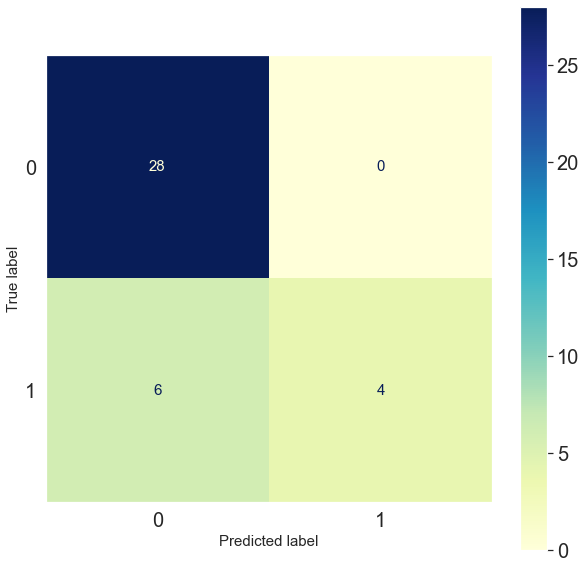

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gbm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap='YlGnBu', ax = ax)
plt.grid(False)

# roc curve

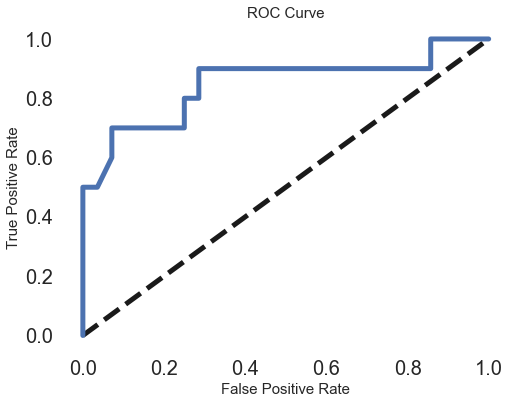

In [ ]:
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(8, 6))
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', linewidth = 5)
ax = plt.gca()
ax.set_facecolor('white')
plt.plot(fpr, tpr, linewidth = 5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

# Feature Importance

In [32]:
important_features = pd.Series(best.feature_importances_, index = X.columns)

/Users/afridshirsekar/opt/anaconda3/envs/Graphnet/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


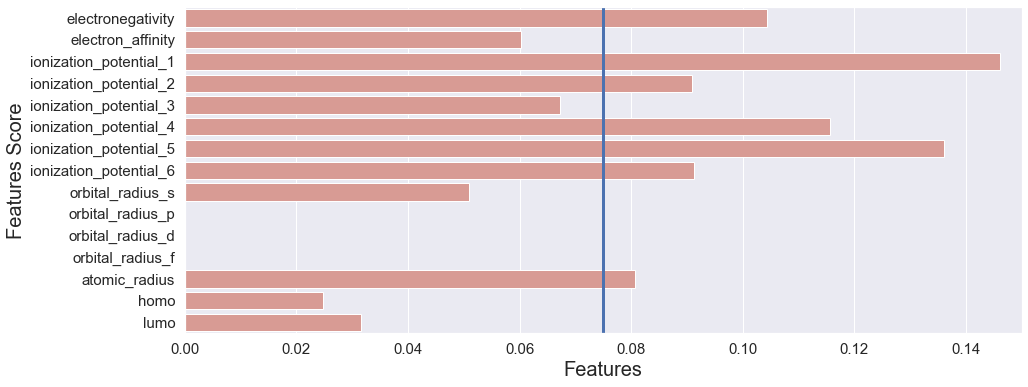

In [33]:
fig = plt.figure(figsize=(15, 6))

ax = sns.barplot(important_features.values, ['electronegativity', 'electron_affinity', 'ionization_potential_1', 'ionization_potential_2', 'ionization_potential_3', 'ionization_potential_4', 'ionization_potential_5', 'ionization_potential_6', 'orbital_radius_s', 'orbital_radius_p', 'orbital_radius_d', 'orbital_radius_f', 'atomic_radius', 'homo', 'lumo' ] , orient='h', color='salmon', saturation=.5)
ax.axvline(0.075, color='b', lw=3)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features Score', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
#plt.tick_params(axis='x', rotation = 90)
plt.xlim(0, 0.15);